In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 20 15:11:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    42W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
X_face = pickle.load(open("/content/drive/MyDrive/image_processed/X_face.pickle","rb"))
y_face = pickle.load(open("/content/drive/MyDrive/image_processed/y_face.pickle","rb"))
print(X_face.shape,y_face.shape)

X_palm = pickle.load(open("/content/drive/MyDrive/image_processed/X_palm.pickle","rb"))
y_palm = pickle.load(open("/content/drive/MyDrive/image_processed/y_palm.pickle","rb"))
print(X_palm.shape,y_palm.shape)

X_eye = pickle.load(open("/content/drive/MyDrive/image_processed/X_eye.pickle","rb"))
y_eye = pickle.load(open("/content/drive/MyDrive/image_processed/y_eye.pickle","rb"))
print(X_eye.shape,y_eye.shape)

(500, 128, 128, 3) (500, 1)
(500, 256, 128, 3) (500, 1)
(500, 256, 128, 3) (500, 1)


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img,img_to_array, load_img
from skimage.util import random_noise

def add_sp_noise(img,amt):
    image = random_noise(img, mode = 's&p',amount = amt)
    image = image *255
    image = image.astype('uint8')
    return image

def gaussian_noise(img,amt):
    image = random_noise(img, mode = 'gaussian',mean=0,var=amt)
    image = image*255
    image = image.astype('uint8')
    return image

datagen_train = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.4,
                zoom_range=0.4,
                horizontal_flip=True,
                fill_mode='nearest')

datagen_validation = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
                )

datagen_test = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
                )

10000
10000
2000
2000


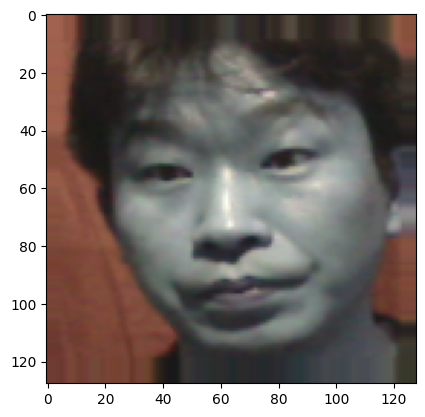

In [7]:
# face processing #
face_train_dataset = []
face_train_label = []

k=0
for i,image in enumerate(X_face):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_train.flow(x,batch_size=1):
        face_train_dataset.append(batch[0])
        face_train_label.append(y_face[i][0]) #append clean pic
        
        k+=1
        if k>=20:
            break
            
print(len(face_train_dataset))
print(len(face_train_label))
plt.imshow(face_train_dataset[0])
########################################################################
face_vt_dataset = []
face_vt_label = []

k=0
for i,image in enumerate(X_face):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_validation.flow(x,batch_size=1):
        face_vt_dataset.append(batch[0])
        face_vt_label.append(y_face[i][0]) #append clean test pic
        
        k+=1
        if k>=4:
            break

print(len(face_vt_dataset))
print(len(face_vt_label))
plt.imshow(face_vt_dataset[0])

In [8]:
face_train = np.array(face_train_dataset)
label_train = np.array(face_train_label).reshape(-1,1)
print(face_train.shape)
print(label_train.shape)

face_vt = np.array(face_vt_dataset)
label_vt = np.array(face_vt_label).reshape(-1,1)
print(face_vt.shape)
print(label_vt.shape)

(10000, 128, 128, 3)
(10000, 1)
(2000, 128, 128, 3)
(2000, 1)


10000
10000
2000
2000


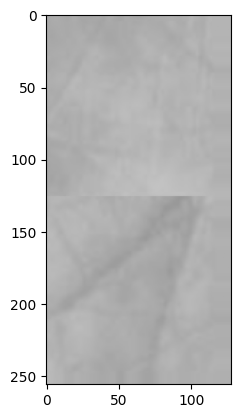

In [9]:
# palm processing #

palm_train_dataset = []
palm_train_label  = []

k=0
for i,image in enumerate(X_palm):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_train.flow(x,batch_size=1):
        palm_train_dataset.append(batch[0]) #append clean pic
        palm_train_label.append(y_palm[i][0])
        
        k+=1
        if k>=20:
            break
            
print(len(palm_train_dataset))
print(len(palm_train_label))
plt.imshow(palm_train_dataset[0])
#################################################################   
palm_vt_dataset = []
palm_vt_label = []

k=0
for i,image in enumerate(X_palm):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_validation.flow(x,batch_size=1):
        palm_vt_dataset.append(batch[0])
        palm_vt_label.append(y_palm[i][0]) #append clean test pic
        
        k+=1
        if k>=4:
            break 

print(len(palm_vt_dataset))
print(len(palm_vt_label))
plt.imshow(palm_vt_dataset[0])

In [10]:
palm_train = np.array(palm_train_dataset)
palm_train_label = np.array(palm_train_label).reshape(-1,1)
print(palm_train.shape)
print(palm_train_label.shape)

palm_vt = np.array(palm_vt_dataset)
palm_vt_label = np.array(palm_vt_label).reshape(-1,1)
print(palm_vt.shape)
print(palm_vt_label.shape)

(10000, 256, 128, 3)
(10000, 1)
(2000, 256, 128, 3)
(2000, 1)


10000
10000
2000
2000


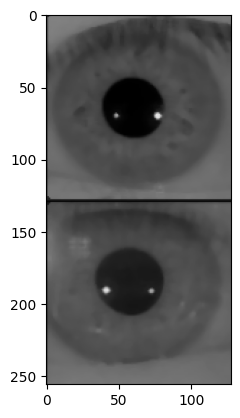

In [11]:
# eye processing #
eye_train_dataset = []
eye_train_label = []

k=0
for i,image in enumerate(X_eye):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_train.flow(x,batch_size=1):
        eye_train_dataset.append(batch[0])
        eye_train_label.append(y_eye[i][0]) #append clean pic

        k+=1
        if k>=20:
            break
            
print(len(eye_train_dataset))
print(len(eye_train_label))
plt.imshow(eye_train_dataset[0])
###################################################################
eye_vt_dataset = []
eye_vt_label = []

k=0
for i,image in enumerate(X_eye):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_validation.flow(x,batch_size=1):
        eye_vt_dataset.append(batch[0])
        eye_vt_label.append(y_eye[i][0]) # append clean test pic
        
        k+=1
        if k>=4:
            break

print(len(eye_vt_dataset))
print(len(eye_vt_label))
plt.imshow(eye_vt_dataset[0])

In [12]:
eye_train = np.array(eye_train_dataset)
eye_train_label = np.array(eye_train_label).reshape(-1,1)
print(eye_train.shape)
print(eye_train_label.shape)

eye_vt = np.array(eye_vt_dataset)
eye_vt_label = np.array(eye_vt_label).reshape(-1,1)
print(eye_vt.shape)
print(eye_vt_label.shape)

(10000, 256, 128, 3)
(10000, 1)
(2000, 256, 128, 3)
(2000, 1)


In [13]:
from sklearn.model_selection import train_test_split
x_valid_face,X_test_face,y_valid_face,y_test_face = train_test_split(face_vt,label_vt,
                                                                     test_size=0.5,random_state=42, 
                                                                     stratify=label_vt)

x_valid_palm,X_test_palm,y_valid_palm,y_test_palm = train_test_split(palm_vt,palm_vt_label,
                                                                     test_size=0.5,random_state=42, 
                                                                     stratify=palm_vt_label)

x_valid_eye,X_test_eye,y_valid_eye,y_test_eye = train_test_split(eye_vt,eye_vt_label,
                                                                     test_size=0.5,random_state=42, 
                                                                     stratify=eye_vt_label)

In [14]:
print(x_valid_eye.shape)
print(x_valid_face.shape)
print(x_valid_palm.shape)

print(X_test_eye.shape)
print(X_test_face.shape)
print(X_test_palm.shape)

print(y_valid_eye.shape)
print(y_valid_face.shape)
print(y_valid_palm.shape)

print(y_test_eye.shape)
print(y_test_face.shape)
print(y_test_palm.shape)

(1000, 256, 128, 3)
(1000, 128, 128, 3)
(1000, 256, 128, 3)
(1000, 256, 128, 3)
(1000, 128, 128, 3)
(1000, 256, 128, 3)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


In [15]:
from keras.layers import *
from keras.models import Model, Sequential
from keras.preprocessing import image

from tensorflow.keras.callbacks import EarlyStopping

In [16]:
image_size1 = [128,128] #face
image_size2 = [256,128] #iris, palm

In [17]:
# face model #

resnet = tf.keras.applications.ResNet101V2(
         include_top=False,
         weights="imagenet",
         input_shape=image_size1 + [3],
)

for layer in resnet.layers:
    layer.trainable = False
    
x_face = Flatten()(resnet.output)

171317808/171317808 [==============================] - 5s 0us/step


In [18]:
# palm model #

InceptionResNetV2 = tf.keras.applications.InceptionResNetV2(
        include_top=False,
        weights="imagenet",
        input_shape= image_size2 + [3],
)

for layer in InceptionResNetV2.layers:
    layer.trainable = False
    
x_palm = Flatten()(InceptionResNetV2.output)

#InceptionResNetV2.summary()

219055592/219055592 [==============================] - 6s 0us/step


In [19]:
# eye model #

VGG16 = tf.keras.applications.VGG16(
              include_top=False,
              weights="imagenet",
              input_shape=image_size2 +[3],
)

for layer in VGG16.layers:
    layer.trainable = False
    
x_eye = Flatten()(VGG16.output)

58889256/58889256 [==============================] - 2s 0us/step


In [20]:
# concat all three model outputs #
combined = concatenate([x_face,x_palm,x_eye], axis = 1 )



In [21]:
#VGG16.summary()

In [22]:
#resnet.summary()

In [23]:
z = Dense(100,activation='softmax')(combined)
model = Model(inputs=[resnet.input, InceptionResNetV2.input, VGG16.input],
              outputs=z)

In [24]:
from tensorflow.keras.utils import plot_model
#from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                min_delta=0.0001,
                patience=20,
                verbose=1,
                mode="auto",
                baseline=None,
                restore_best_weights=True,
                )

opt = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
)


model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [26]:
import time

st =  time.time()

history = model.fit(
    [face_train, palm_train,eye_train], 
    label_train,
    epochs=100,
    batch_size = 64,
    validation_data=([x_valid_face, x_valid_palm, x_valid_eye], y_valid_eye),
    callbacks=early_stopping
)

et =  time.time()
elapsed_time = et - st
print('training time = ', elapsed_time, ' seconds')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


157/157 [==============================] - 53s 161ms/step - loss: 3.1669 - accuracy: 0.7607 - val_loss: 0.0851 - val_accuracy: 0.9780
Epoch 2/100
157/157 [==============================] - 14s 91ms/step - loss: 0.1397 - accuracy: 0.9742 - val_loss: 0.1811 - val_accuracy: 0.9740
Epoch 3/100
157/157 [==============================] - 14s 91ms/step - loss: 0.1533 - accuracy: 0.9759 - val_loss: 0.0981 - val_accuracy: 0.9830
Epoch 4/100
157/157 [==============================] - 14s 91ms/step - loss: 0.2345 - accuracy: 0.9701 - val_loss: 0.2239 - val_accuracy: 0.9710
Epoch 5/100
157/157 [==============================] - 15s 95ms/step - loss: 0.2682 - accuracy: 0.9685 - val_loss: 0.0681 - val_accuracy: 0.9910
Epoch 6/100
157/157 [==============================] - 14s 91ms/step - loss: 0.1911 - accuracy: 0.9786 - val_loss: 0.2620 - val_accuracy: 0.9710
Epoch 7/100
157/157 [==============================] - 15s 95ms/step - loss: 0.0994 - accuracy: 0.9863 - val_loss: 0.0104 - val_accuracy: 0.9

# Model Evaluation


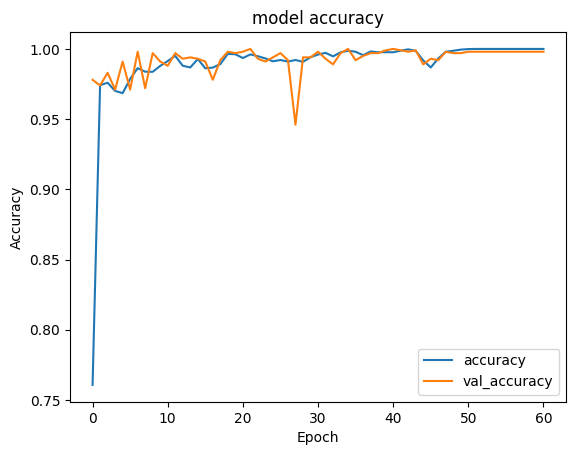

In [27]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("model accuracy")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
#plt.ylim
plt.legend(loc='lower right')

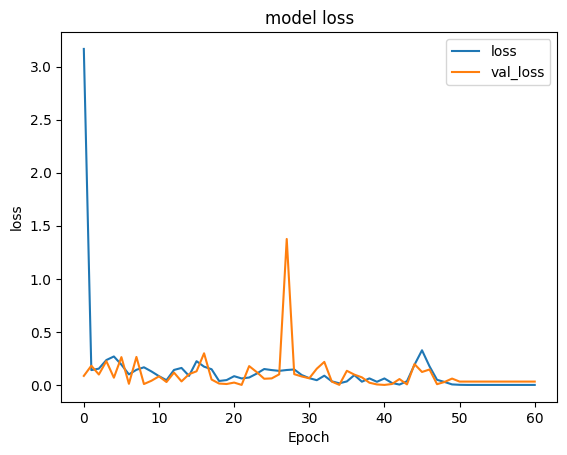

In [28]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title("model loss")
plt.xlabel("Epoch")
plt.ylabel('loss')
#plt.ylim
plt.legend(loc='upper right')

In [29]:
test_loss,test_acc = model.evaluate([X_test_face, X_test_palm, X_test_eye], y_test_eye, verbose=2)
print(test_acc)
print(test_loss)

32/32 - 4s - loss: 0.1414 - accuracy: 0.9950 - 4s/epoch - 114ms/step
0.9950000047683716
0.14139297604560852


In [47]:
# save the model trained
os.chdir('/content/drive/MyDrive/image_processed')

model.save('100_model.h5')

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

In [31]:
y_pred = model.predict([X_test_face, X_test_palm, X_test_eye])  # Replace X_test with your test data
#y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels if needed
print(y_pred)

32/32 [==============================] - 7s 49ms/step
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
y_pred_proba = y_pred

In [33]:
testing_ypred = np.argmax(y_pred, axis=1)
print(testing_ypred)

[98 66 25 86 79 90 74 40  9 38 23 65 18 32 38  1 76 72 41 25 81 35 48 17
 49 11 59 26 47 76 74 29 16  0 20 92 90 68 84 63 67 52 80 87 87 67 33 65
 96 10  6 87  7 71 16 60 73 84 30 95 70 96 57 89 63  2 51 65 50 21 83 38
 38 15 38 28 75 55 25 27 37  9 66  9 39 57  0 70 11 91 98 53 40 86 79 75
 93 95 99 96 36 55  0 31  0 66 40  3 73 22 43 26 15 50 88 95 15 45 21 40
 53 54 96 62 99 37 95 56 44 62  8 39 17 81  6  1 39 10 66 28 76 20 29 13
 52 94 31 46 53 77 24 91 20  3 56 66 78 88 30 78 73  2 46 98 25 12 16 80
 11 17  1 45 93 27 92 87 32 78 94 43 57 39 38  4 97 64  0 54 90 91 88 74
 18 90 89  1 59 89 92 13 41 26  0 15 90 92 71 39 57 50 34 35 53 56 48 76
 50 25 22 55 64 83 13 29 54 10 13 67 71 27 28 73 94 11 11 22 98 35 37  8
 57 45 79  9 94 56  5 75 19 85 60 78 71 61  2 73 14 85 40 81 86 88 61 71
 82 58 77 35 58 77 31 57 47  2 95 75 85 21 73 99  6 10 91 55 20 94  5 34
 32 76 37 70 94 71  4  8 42 23 65 50 56 53 35 13 24 58 94 19 27 34 25  1
 51 54 68 29 71 67 23 31  3 24 46 99 83 93 30  6 26

In [34]:
print(y_test_eye.shape)
print(testing_ypred.shape)

(1000, 1)
(1000,)


In [35]:
testing_ypred = testing_ypred.reshape(-1,1)
print(testing_ypred)

[[98]
 [66]
 [25]
 [86]
 [79]
 [90]
 [74]
 [40]
 [ 9]
 [38]
 [23]
 [65]
 [18]
 [32]
 [38]
 [ 1]
 [76]
 [72]
 [41]
 [25]
 [81]
 [35]
 [48]
 [17]
 [49]
 [11]
 [59]
 [26]
 [47]
 [76]
 [74]
 [29]
 [16]
 [ 0]
 [20]
 [92]
 [90]
 [68]
 [84]
 [63]
 [67]
 [52]
 [80]
 [87]
 [87]
 [67]
 [33]
 [65]
 [96]
 [10]
 [ 6]
 [87]
 [ 7]
 [71]
 [16]
 [60]
 [73]
 [84]
 [30]
 [95]
 [70]
 [96]
 [57]
 [89]
 [63]
 [ 2]
 [51]
 [65]
 [50]
 [21]
 [83]
 [38]
 [38]
 [15]
 [38]
 [28]
 [75]
 [55]
 [25]
 [27]
 [37]
 [ 9]
 [66]
 [ 9]
 [39]
 [57]
 [ 0]
 [70]
 [11]
 [91]
 [98]
 [53]
 [40]
 [86]
 [79]
 [75]
 [93]
 [95]
 [99]
 [96]
 [36]
 [55]
 [ 0]
 [31]
 [ 0]
 [66]
 [40]
 [ 3]
 [73]
 [22]
 [43]
 [26]
 [15]
 [50]
 [88]
 [95]
 [15]
 [45]
 [21]
 [40]
 [53]
 [54]
 [96]
 [62]
 [99]
 [37]
 [95]
 [56]
 [44]
 [62]
 [ 8]
 [39]
 [17]
 [81]
 [ 6]
 [ 1]
 [39]
 [10]
 [66]
 [28]
 [76]
 [20]
 [29]
 [13]
 [52]
 [94]
 [31]
 [46]
 [53]
 [77]
 [24]
 [91]
 [20]
 [ 3]
 [56]
 [66]
 [78]
 [88]
 [30]
 [78]
 [73]
 [ 2]
 [46]
 [98]
 [25]
 [12]
 [16

In [36]:
print(y_test_eye==testing_ypred)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

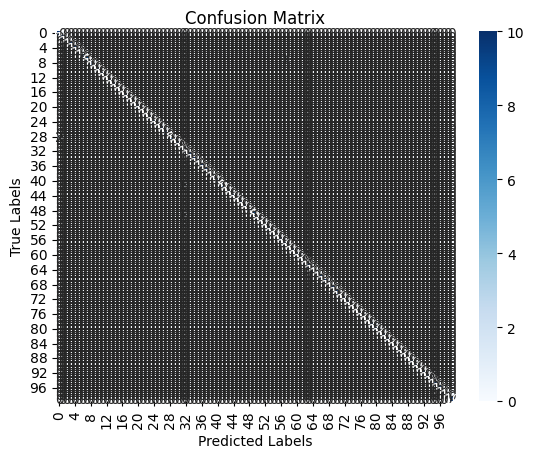

In [37]:
cm = confusion_matrix(y_test_eye, testing_ypred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Compute precision and recall
precision = precision_score(y_test_eye, testing_ypred, average='weighted')
recall = recall_score(y_test_eye, testing_ypred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9957575757575757
Recall: 0.995


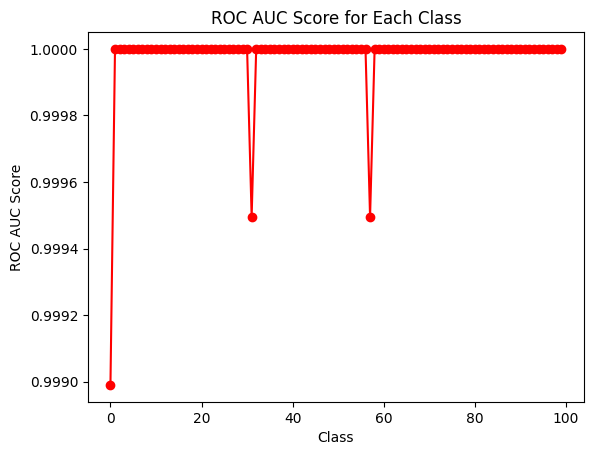

Average ROC AUC Score: 0.999979797979798


In [39]:
from sklearn.metrics import roc_auc_score

# Assuming y_test and y_pred_proba are your true labels and predicted probabilities for the test data
num_classes=100
# Calculate the ROC AUC scores for each class
roc_auc_scores = []
for class_idx in range(num_classes):
    y_true_class = (y_test_eye == class_idx).astype(int)  # Create binary labels for the current class
    y_pred_proba_class = y_pred_proba[:, class_idx]  # Get predicted probabilities for the current class
    roc_auc = roc_auc_score(y_true_class, y_pred_proba_class)
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score
average_roc_auc = np.mean(roc_auc_scores)

# Plot the average ROC AUC score
plt.figure()
plt.plot(range(num_classes), roc_auc_scores, 'ro-')
plt.xlabel('Class')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score for Each Class')
plt.show()

# Print the average ROC AUC score
print("Average ROC AUC Score:", average_roc_auc)

In [40]:
roc_auc_score(y_test_eye,y_pred_proba,multi_class="ovr")

0.999979797979798

In [41]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y_test_eye)
y=label_encoder.transform(y_test_eye)
classes=label_encoder.classes_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


100


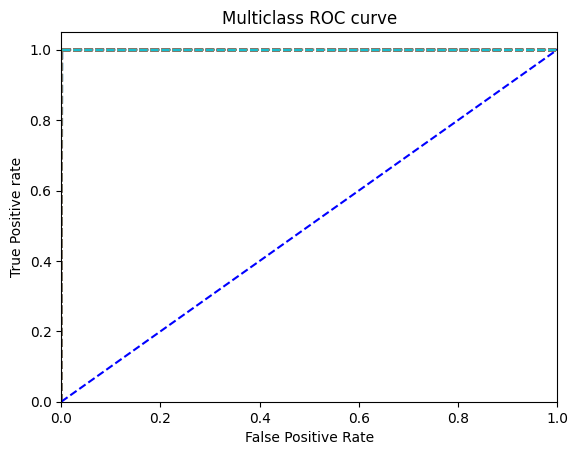

In [43]:

#binarize the y_values

y_test_binarized=label_binarize(y_test_eye,classes=np.unique(y_test_eye))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 100
print(n_class)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
#plt.legend(loc='lower right')
plt.show()

In [44]:
# Assuming you have the predicted labels (testing_ypred) and true labels (y_true) for a multi-class model

# Calculate the confusion matrix
cm = confusion_matrix(y_test_eye, testing_ypred)

num_classes = len(np.unique(y_test_eye))

sensitivity_scores = []
specificity_scores = []
far_scores = []
frr_scores = []

for class_idx in range(num_classes):
    # Extract the true positives, true negatives, false positives, and false negatives for the current class
    TP = cm[class_idx, class_idx]
    TN = np.sum(np.delete(np.delete(cm, class_idx, axis=0), class_idx, axis=1))
    FP = np.sum(cm[:, class_idx]) - TP
    FN = np.sum(cm[class_idx, :]) - TP

    # Calculate sensitivity (true positive rate) and specificity for the current class
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Calculate FAR (False Acceptance Rate) and FRR (False Rejection Rate) for the current class
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)    

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)

    far_scores.append(FAR)
    frr_scores.append(FRR)

# Calculate average sensitivity and specificity across all classes
average_sensitivity = np.mean(sensitivity_scores)
average_specificity = np.mean(specificity_scores)

# Calculate average FAR and FRR
average_far = np.mean(far_scores)
average_frr = np.mean(frr_scores)

# Print sensitivity and specificity for each class
for class_idx in range(num_classes):
    print(f"Class {class_idx}: Sensitivity = {sensitivity_scores[class_idx]}, Specificity = {specificity_scores[class_idx]}")
    print(f"Class {class_idx}: FAR = {far_scores[class_idx]}, FRR = {frr_scores[class_idx]}")

# Print average sensitivity and specificity
print(f"Average Sensitivity: {average_sensitivity}")
print(f"Average Specificity: {average_specificity}")

# Print average FAR and FRR
print("Average FAR:", average_far)
print("Average FRR:", average_frr)

Class 0: Sensitivity = 1.0, Specificity = 0.997979797979798
Class 0: FAR = 0.00202020202020202, FRR = 0.0
Class 1: Sensitivity = 1.0, Specificity = 1.0
Class 1: FAR = 0.0, FRR = 0.0
Class 2: Sensitivity = 1.0, Specificity = 1.0
Class 2: FAR = 0.0, FRR = 0.0
Class 3: Sensitivity = 1.0, Specificity = 1.0
Class 3: FAR = 0.0, FRR = 0.0
Class 4: Sensitivity = 1.0, Specificity = 1.0
Class 4: FAR = 0.0, FRR = 0.0
Class 5: Sensitivity = 1.0, Specificity = 1.0
Class 5: FAR = 0.0, FRR = 0.0
Class 6: Sensitivity = 1.0, Specificity = 1.0
Class 6: FAR = 0.0, FRR = 0.0
Class 7: Sensitivity = 0.9, Specificity = 1.0
Class 7: FAR = 0.0, FRR = 0.1
Class 8: Sensitivity = 1.0, Specificity = 1.0
Class 8: FAR = 0.0, FRR = 0.0
Class 9: Sensitivity = 1.0, Specificity = 1.0
Class 9: FAR = 0.0, FRR = 0.0
Class 10: Sensitivity = 1.0, Specificity = 1.0
Class 10: FAR = 0.0, FRR = 0.0
Class 11: Sensitivity = 1.0, Specificity = 1.0
Class 11: FAR = 0.0, FRR = 0.0
Class 12: Sensitivity = 1.0, Specificity = 1.0
Class 1

In [45]:
# Assuming you have the predicted probabilities (y_pred_proba) and true labels (y_true) for a multi-class model

# Calculate the confusion matrix
cm = confusion_matrix(y_test_eye, testing_ypred)

num_classes = len(np.unique(y_test_eye))

tpr_scores = []
fpr_scores = []

for class_idx in range(num_classes):
    # Extract the true positives, true negatives, false positives, and false negatives for the current class
    TP = cm[class_idx, class_idx]
    TN = np.sum(np.delete(np.delete(cm, class_idx, axis=0), class_idx, axis=1))
    FP = np.sum(cm[:, class_idx]) - TP
    FN = np.sum(cm[class_idx, :]) - TP

    # Calculate sensitivity (true positive rate) and specificity for the current class
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Calculate TPR and FPR in percentage
    tpr = sensitivity * 100
    fpr = (1 - specificity) * 100

    tpr_scores.append(tpr)
    fpr_scores.append(fpr)

# Calculate average TPR and FPR
average_tpr = np.mean(tpr_scores)
average_fpr = np.mean(fpr_scores)

# Print average TPR and FPR
print("Average TPR:", average_tpr)
print("Average FPR:", average_fpr)


Average TPR: 99.5
Average FPR: 0.005050505050505083


In [46]:
# Get the predicted labels by choosing the class with the highest probability
#predicted_labels = np.argmax(testing_ypred, axis=1)

# Calculate classification report
report = classification_report(y_test_eye, testing_ypred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      0.90      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00    

## FINE TUNING ##

unfreeze certain layers in resnet (face), inceptionresnet(palm), vgg16(eye) respectively
-train with same dataset, see the result


In [ ]:
fine_tuning = modelasdasdasd